# Load Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('processed_data.csv')

# Academic Progragrams against different Demographics

## Gender

    GENDER  PROGRAM/MAJOR  Count
0        1             24   1018
1        1             54    982
2        1             40    896
3        1             27    840
4        1             16    805
5        1             52    805
6        1             43    783
7        1             33    766
8        1             57    733
9        1             68    692
10       2             24   1162
11       2             78    953
12       2             16    936
13       2              4    759
14       2             27    692
15       2             79    620
16       2             81    573
17       2             52    543
18       2             26    525
19       2             25    489


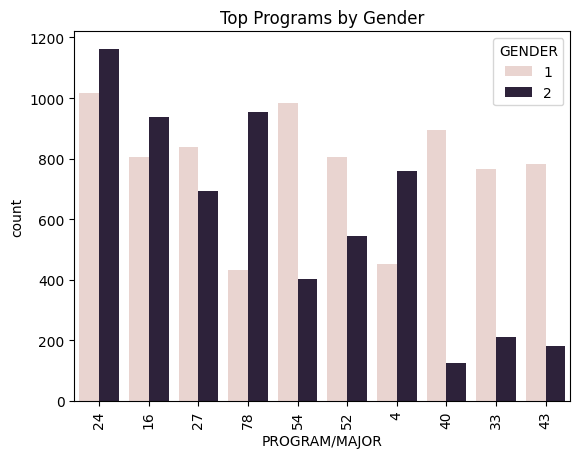

In [30]:
#Academic Programs against different Demographics
top_programs = df['PROGRAM/MAJOR'].value_counts().head(10).index

gender_program_counts = df.groupby(['GENDER', 'PROGRAM/MAJOR']).size().reset_index(name='Count')
top_gender_programs = gender_program_counts.sort_values(['GENDER', 'Count'], ascending=[True, False]).groupby('GENDER').head(10).reset_index(drop=True)
print(top_gender_programs)

sns.countplot(data=df, x='PROGRAM/MAJOR', hue='GENDER', order=df['PROGRAM/MAJOR'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Top Programs by Gender")
plt.show()


## Age Range

    AGE RANGE OF ENROLLED STUDENT  PROGRAM/MAJOR  Count
0                               0             16    477
1                               0             40    410
2                               0             24    331
3                               0             78    309
4                               0             43    288
5                               0             52    276
6                               0             67    228
7                               0              4    223
8                               0             33    194
9                               0             41    194
10                              1             16    468
11                              1             78    379
12                              1             24    312
13                              1             43    292
14                              1              4    281
15                              1             40    253
16                              1             52

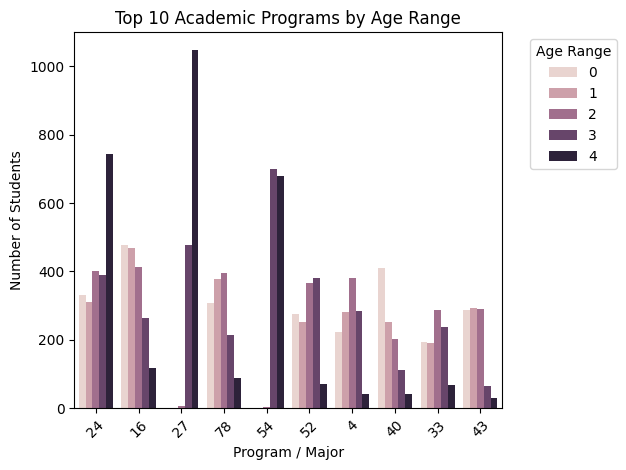

In [31]:
gender_program_counts = df.groupby(['AGE RANGE OF ENROLLED STUDENT', 'PROGRAM/MAJOR']).size().reset_index(name='Count')
top_age_programs = gender_program_counts.sort_values(['AGE RANGE OF ENROLLED STUDENT', 'Count'], ascending=[True, False]).groupby('AGE RANGE OF ENROLLED STUDENT').head(10).reset_index(drop=True)
print(top_age_programs)
filtered_data = df[df['PROGRAM/MAJOR'].isin(top_programs)]


sns.countplot(data=filtered_data,
              x='PROGRAM/MAJOR',
              hue='AGE RANGE OF ENROLLED STUDENT',
              order=top_programs)

plt.title("Top 10 Academic Programs by Age Range")
plt.xlabel("Program / Major")
plt.ylabel("Number of Students")
plt.legend(title="Age Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Study Mode

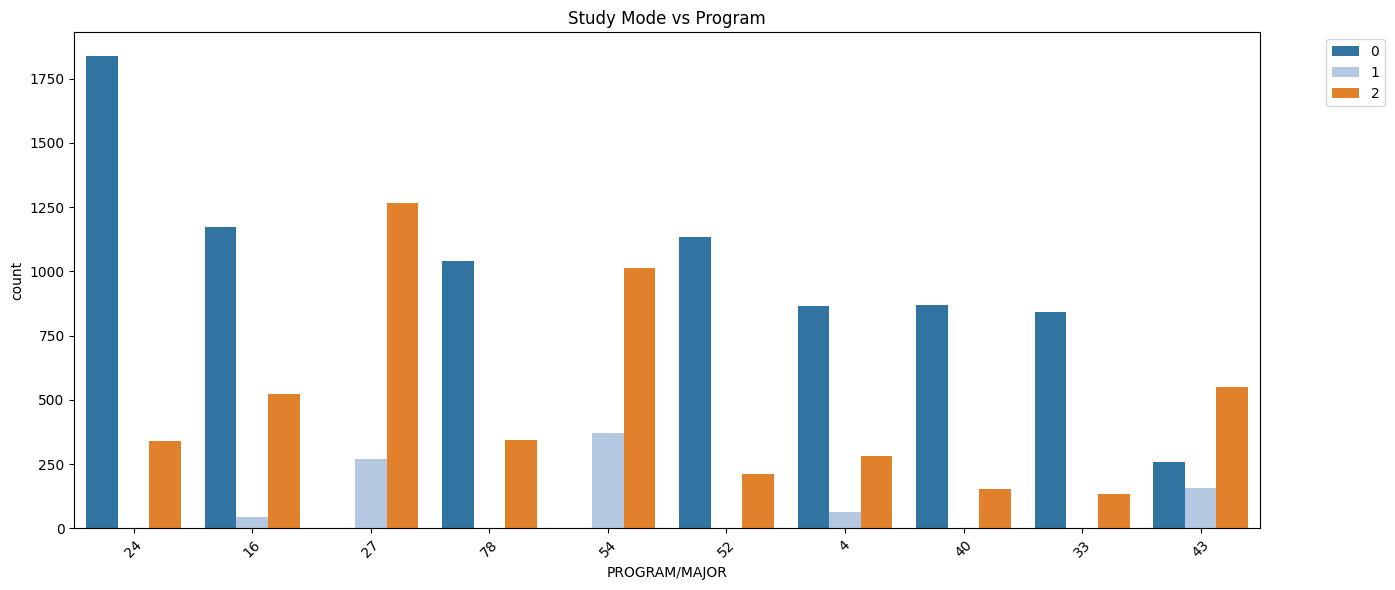

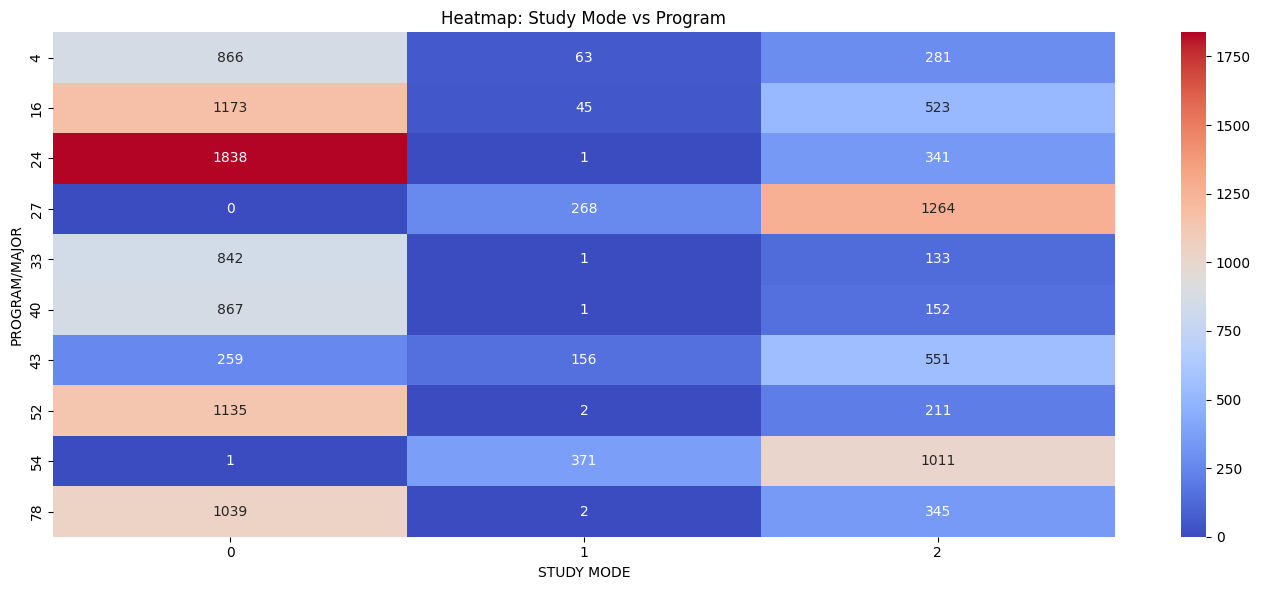

In [37]:
# Countplot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='PROGRAM/MAJOR', hue='STUDY MODE', palette='tab20', order=top_programs)
plt.title('Study Mode vs Program')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap
heatmap_data = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['STUDY MODE'])
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap: Study Mode vs Program")
plt.tight_layout()
plt.show()


## Shift/Schedule vs Program Major

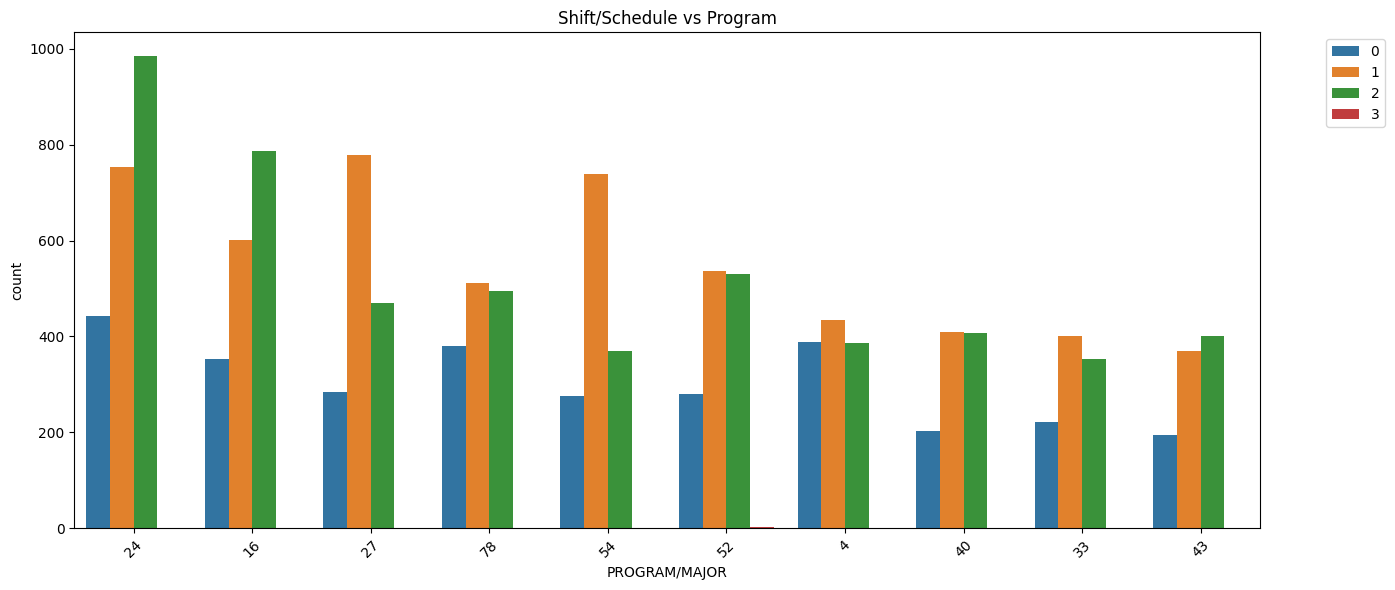

In [38]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='PROGRAM/MAJOR', hue='SHIFT/SCHEDULE', palette='tab10', order=top_programs)
plt.title('Shift/Schedule vs Program')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Program/Major vs Benefit Discounts

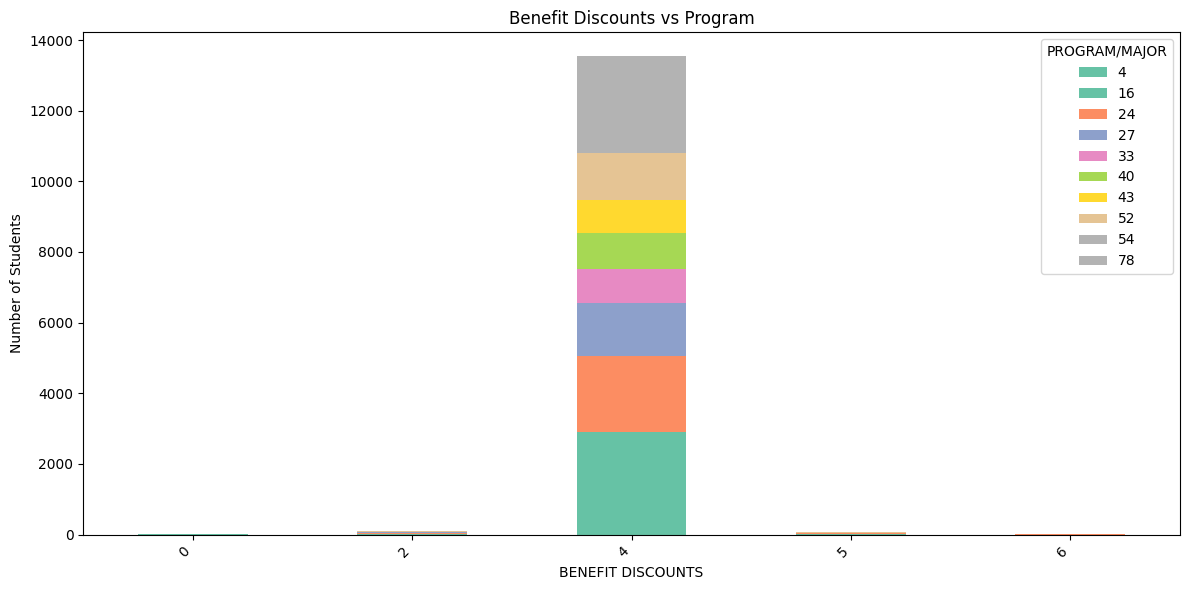

In [41]:
benefit_program = pd.crosstab(filtered_data['BENEFIT DISCOUNTS'], filtered_data['PROGRAM/MAJOR'])
benefit_program.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Benefit Discounts vs Program")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Deparment vs Program/Major

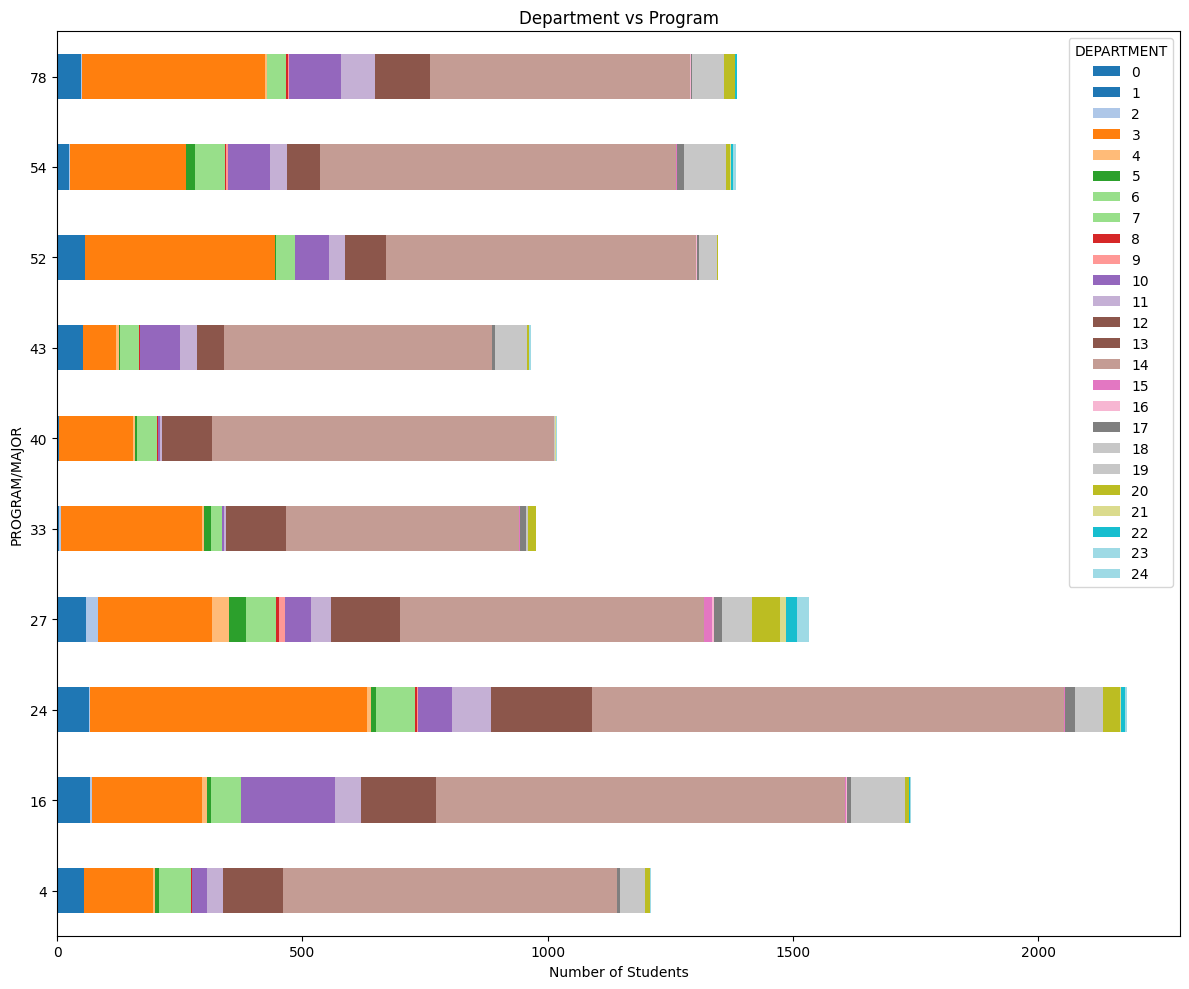

In [45]:
dept_prog = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['DEPARTMENT'])
dept_prog.plot(kind='barh', stacked=True, figsize=(12, 10), colormap='tab20')
plt.title("Department vs Program")
plt.xlabel("Number of Students")
plt.tight_layout()
plt.show()


## Enrollment vs Program/Major

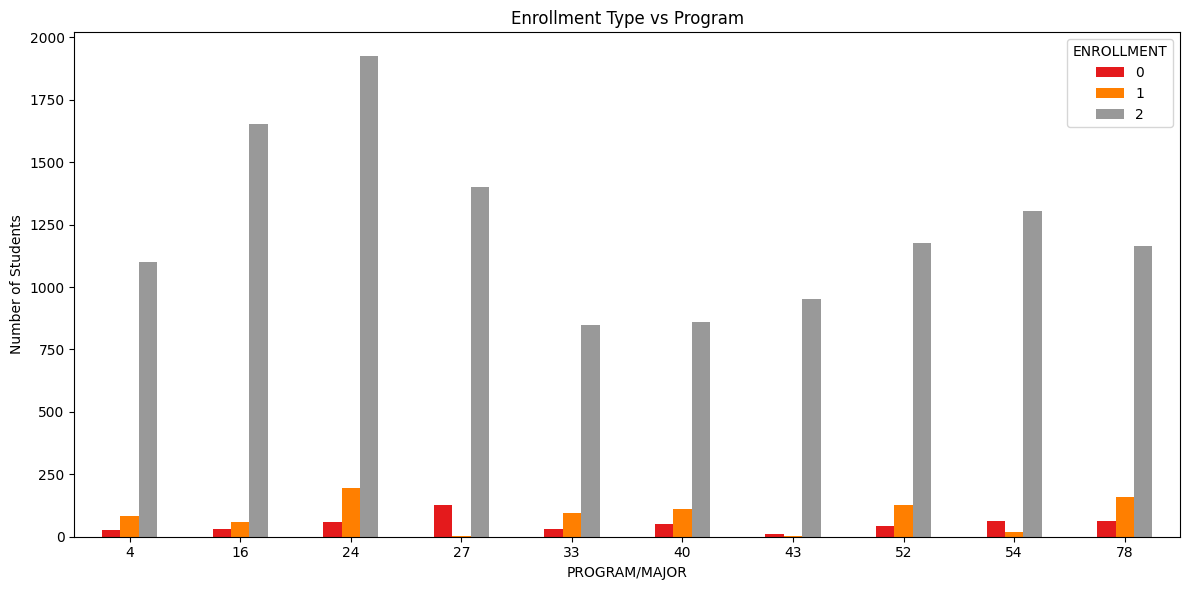

In [44]:
enrollment_program = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['ENROLLMENT'])
enrollment_program.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title("Enrollment Type vs Program")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Enrolled Courses vs At risk

C:\Users\prach\AppData\Local\Temp\ipykernel_11972\962115654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


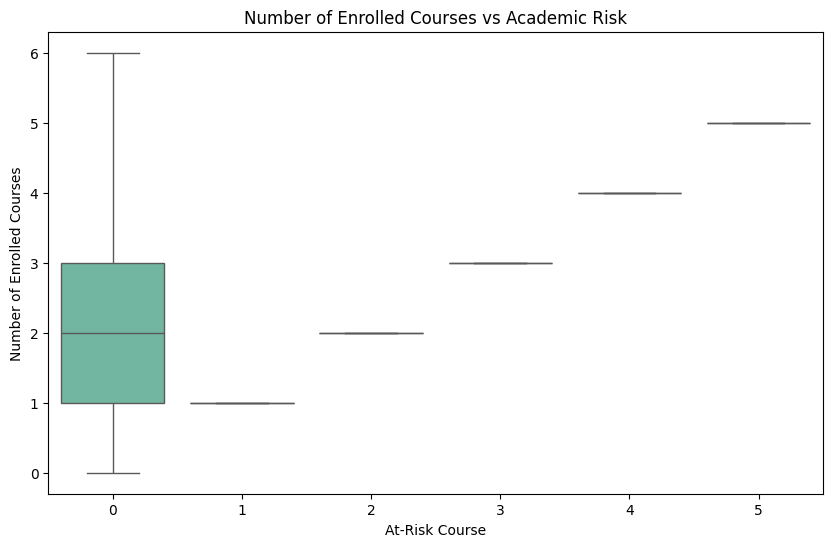

C:\Users\prach\AppData\Local\Temp\ipykernel_11972\962115654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


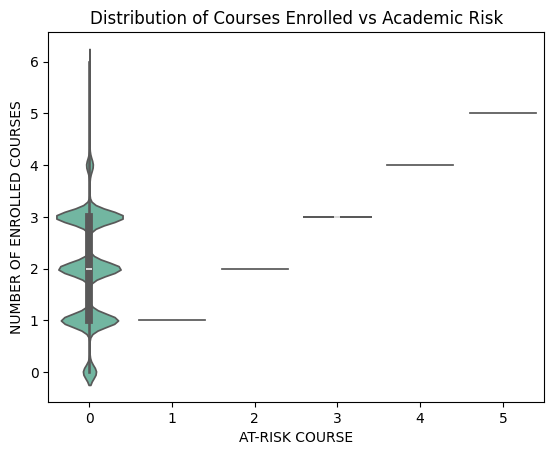

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='AT-RISK COURSE',
            y='NUMBER OF ENROLLED COURSES',
            palette='Set2')

plt.title("Number of Enrolled Courses vs Academic Risk")
plt.xlabel("At-Risk Course")
plt.ylabel("Number of Enrolled Courses")
plt.show()


sns.violinplot(data=df,
               x='AT-RISK COURSE',
                y='NUMBER OF ENROLLED COURSES',
               palette='Set2')
plt.title("Distribution of Courses Enrolled vs Academic Risk")
plt.show()
